In [15]:
from visualization_fct import *
from sklearn.mixture import GaussianMixture

# from bokeh.plotting import output_file, show, save
# from bokeh.mpl import to_bokeh

from bokeh.resources import CDN
from bokeh.embed import file_html

import matplotlib.pyplot as plt  # , mpld3
import pyfits


# for now, no ratio in data (no rates A, B or C in this dataset)

only_flux = True
scale_flux = False

hdulist = pyfits.open('../iirc_data/all_data_for_ml.fits')
data = hdulist[1].data

X_flux, X, data_thr, data_fr_en = get_iirc_data(
    data, only_flux=only_flux, scale_flux=scale_flux, thresholded=True)[:4]

# GMM with 3 components: 
np.random.seed(0)

gmm = GaussianMixture(n_components=3, n_init=50).fit(X)
preds = gmm.predict(X)
probs = gmm.predict_proba(X)

data_thr['preds'] = pd.Series(preds).astype("category")

color_key = ["red", "yellow", "blue", "grey", "black", "purple", "pink",
             "brown", "green", "orange"]  # Spectral9
color_key = color_key[:len(set(preds))+1]

covs = gmm.covariances_
means = gmm.means_

set(preds)

{2}

In [4]:
# try fusing columns 2 by 2: 
data_thr2 = pd.DataFrame()
for j in range(len(data_thr.columns) / 2 - 1):
    data_thr2[str(j)] = (data_thr[str(2*j)] + data_thr[str(2*j+1)]) / 2.

X2 = np.concatenate([np.array(data_thr2[name]).reshape(-1, 1) for name in data_thr2.columns], axis=1)

gmm = GaussianMixture(n_components=3, n_init=5).fit(X2)
preds = gmm.predict(X2)
probs = gmm.predict_proba(X2)

data_thr2['preds'] = pd.Series(preds).astype("category")

color_key = ["red", "yellow", "blue", "grey", "black", "purple", "pink",
             "brown", "green", "orange"]  # Spectral9
color_key = color_key[:len(set(preds))+1]

covs = gmm.covariances_
means = gmm.means_

In [5]:
set(preds)

{0}

In [7]:
probs

array([[ 0.49060081,  0.16660523,  0.34279396],
       [ 0.49060081,  0.16660523,  0.34279396],
       [ 0.49060081,  0.16660523,  0.34279396],
       ..., 
       [ 0.49060081,  0.16660523,  0.34279396],
       [ 0.49060081,  0.16660523,  0.34279396],
       [ 0.49060081,  0.16660523,  0.34279396]])

In [12]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()
p = figure()
hist, edges = np.histogram(data_thr['50'], bins=100)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:])
show(p)

Loading BokehJS ...

In [13]:
args = np.argsort(data['tstart'].byteswap().newbyteorder())


data_fr = pd.DataFrame(data['flux'].byteswap().newbyteorder()[args])
# convert attributes to str:
data_fr.columns = [str(j) for j in data_fr.columns]

data_fr['tstart'] = data['tstart'].byteswap().newbyteorder()[args]

# rm the rows with nan values:
data_fr = data_fr.dropna()


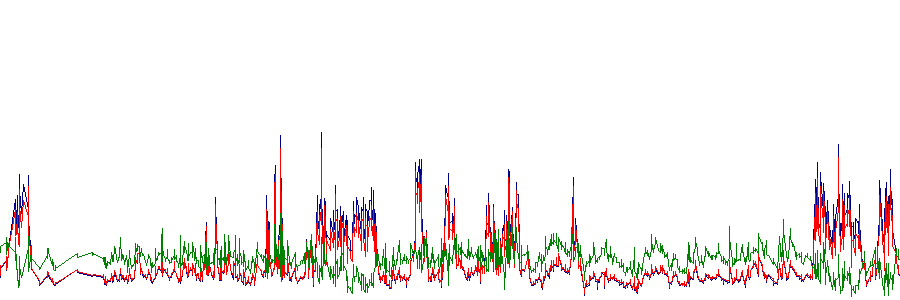

In [18]:
cvs = ds.Canvas(plot_height=300, plot_width=900, x_range=[data_fr['tstart'].min(), data_fr['tstart'].max()], y_range=[0, 5e-8])
imgs = [tf.interpolate(cvs.line(data_fr, 'tstart', '0')),  #agg dans cvs.line
        tf.interpolate(cvs.line(data_fr, 'tstart', '1'), cmap=['red']),
        #tf.interpolate(cvs.line(data_fr, 'tstart', '50'), cmap=['black']),
        tf.interpolate(cvs.line(data_fr, 'tstart', '30'), cmap=['green'])]
tf.stack(*imgs)

In [19]:
interactive_img_ds(data_thr, '1', '70', preds=False)